# Lab 1 -- Signal

In this tutorial, we will guide you through the key concepts of this course -- signal. For those who have completed ELEC3241 and ELEC3244, you'll find these concepts familiar and easier to grasp. However, I understand that many of you might be encountering signal processing for the first time in your studies at HKU. Don't worry if that's the case! This lab is designed to be self-contained, ensuring that all students, regardless of their prior exposure to the subject, can follow along comfortably.

Let's start by understanding what a signal is. Actually, you are already an expert of signal. Broadly speaking,  a signal encompasses anything that can be perceived, such as images, videos, audio, text, radar, and Wi-Fi signals. The human body itself is an extraordinary signal processing system, continuously adapting to process complex audio and video signals. Mathematically, signal is some function of time that is derived from the physical world, i.e.
$$
    \mathbf{s} = s(t), \quad -\infty < t < \infty.
$$
Note that the signal is a finite real valued function. These are derived from physical requirement. We use $t$ to denote time. Depending on the nature of $t$, signals can be classified as either analog or digital. An analog signal has a continuous time variable, $s(t)$, while a digital signal features discrete time intervals, represented as $s_n$, making it suitable for computer processing. The term 'digital' signifies that the continuous time variable $t$ has been quantized into discrete values using specific methods. Normally, we denote $s(t)$ as the signal. Sometimes we refer to $s_n$ to emphisize the digitality. 

In the realm of signal processing, we view a signal as a function that conveys information about a particular phenomenon. Essentially, any variable quantity that changes over time or space can serve as a signal, facilitating the communication of messages between observers.

**The key question in signal processing is:  how we can model a signal?** We will illustrate it with a few examples.

### Example 1: Video and Audio

Let's begin by exploring a practical example from the real world. Among the various types of signals, video and audio are the most easily perceivable by humans. To illustrate this, we will use a specific example `example_data/example_1.mp4`.

In [5]:
from moviepy import VideoFileClip
from rich import inspect
from matplotlib import pyplot as plt

In [6]:
data_f = f"./example_data/example_1.mp4"

vfc = VideoFileClip(data_f) # load video file
inspect(vfc.reader.infos) # inspect video file metadata

{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf58.29.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1280, 720], 'bitrate': 613, 'fps': 25.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'ISO Media file produced by Google Inc.', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 128, 'metadata': {'Metadata': '', 'handler_name': 'ISO Media file produced by Google Inc.', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 3.04, 'bitrate': 752, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1280, 720], 'video_bitrate': 613, 'vide

╭─────────────────────────────────── <class 'dict'> ────────────────────────────────────╮
│ dict() -> new empty dictionary                                                        │
│ dict(mapping) -> new dictionary initialized from a mapping object's                   │
│     (key, value) pairs                                                                │
│ dict(iterable) -> new dictionary initialized as if via:                               │
│     d = {}                                                                            │
│     for k, v in iterable:                                                             │
│         d[k] = v                                                                      │
│ dict(**kwargs) -> new dictionary initialized with the name=value pairs                │
│     in the keyword argument list.  For example:  dict(one=1, two=2)                   │
│                                                                                       │
│ ╭───────────────────────────────────────────────────────────────────────────────────╮ │
│ │ {                                                                                 │ │
│ │ │   'video_found': True,                                                          │ │
│ │ │   'audio_found': True,                                                          │ │
│ │ │   'metadata': {                                                                 │ │
│ │ │   │   'major_brand': 'isom',                                                    │ │
│ │ │   │   'minor_version': '512',                                                   │ │
│ │ │   │   'compatible_brands': 'isomiso2avc1mp41',                                  │ │
│ │ │   │   'encoder': 'Lavf58.29.100'                                                │ │
│ │ │   },                                                                            │ │
│ │ │   'inputs': [                                                                   │ │
│ │ │   │   {                                                                         │ │
│ │ │   │   │   'streams': [                                                          │ │
│ │ │   │   │   │   {                                                                 │ │
│ │ │   │   │   │   │   'input_number': 0,                                            │ │
│ │ │   │   │   │   │   'stream_number': 0,                                           │ │
│ │ │   │   │   │   │   'stream_type': 'video',                                       │ │
│ │ │   │   │   │   │   'language': None,                                             │ │
│ │ │   │   │   │   │   'default': True,                                              │ │
│ │ │   │   │   │   │   'size': [1280, 720],                                          │ │
│ │ │   │   │   │   │   'bitrate': 613,                                               │ │
│ │ │   │   │   │   │   'fps': 25.0,                                                  │ │
│ │ │   │   │   │   │   'codec_name': 'h264',                                         │ │
│ │ │   │   │   │   │   'profile': '(High)',                                          │ │
│ │ │   │   │   │   │   ... +1                                                        │ │
│ │ │   │   │   │   },                                                                │ │
│ │ │   │   │   │   {                                                                 │ │
│ │ │   │   │   │   │   'input_number': 0,                                            │ │
│ │ │   │   │   │   │   'stream_number': 1,                                           │ │
│ │ │   │   │   │   │   'stream_type': 'audio',                                       │ │
│ │ │   │   │   │   │   'language': None,                                             │ │
│ │ │   │   │   │   │   'default': True,                                              │ │
│ │ │   │   │   │   │   'fps': 44100,                                                 │ │
│ │ │   │   │   │   │   'bitrate': 128, 

From above inspection, we can observe that the **duration** of this video is 3.04s, with **video size** (1280, 720) and video **frame rate (fps - frame per second)** 25Hz. It also contains simultateous sound, with **sampling rate** 44100. We will delve deeper into these parameters more concretely.

We'll start our exploration by examining the first frame of the video. A video is essentially a sequence of images, with each image representing a frame.

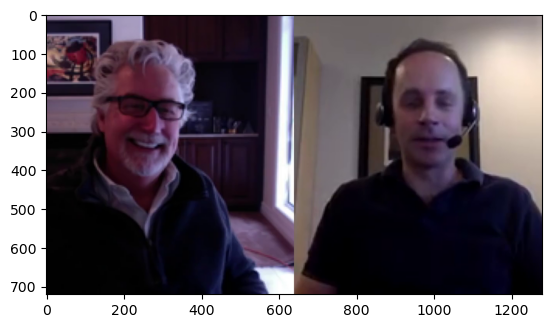

In [7]:
video_data_0 = vfc.get_frame(0) # get first frame
plt.imshow(video_data_0)

By analyzing the first frame,  we can observe the video has height 720 and width 1280, corresponding to the video size. 

Intuitively, the frame shows two people are talking via video conference. This simple observation leads us to an intriguing question: How do we arrive at such a specific interpretation from just a single image? 

Conceputually, our brain has the ability to automatically associate this particular arrangement of pixels. It is usually attributed to **spatial features**. Spatial features refer to the way elements are arranged and interact within a space. In the context of this image, these features include the positioning and orientation of the two people, the presence of devices like earphones suggesting a video call, and even the background elements that provide context. Our brain rapidly analyzes these spatial features to interpret the scene. This process is similar to how we understand any visual signal. By decoding spatial features – the arrangement, size, and relationship of objects in the space – we can quickly make sense of what we see. 

We then move forward to see the whole video.

In [8]:
from IPython.display import Video, HTML
# show data_f video using HTML
HTML(f"""
<video width="960" height="540" controls>
    <source src="example_data/example_1.mp4">
</video>
""")


We can clearly see the video lasts around 3s. What does it mean? The single frame changes over time. As we observe the video, we notice that the person on the left is talking while the person on the right remains almostly still. This difference in activity between the two individuals highlights the **temporal features** of the video. Each frame captures a momentary snapshot, and when these frames are viewed in rapid succession, they create the illusion of motion and change. By analyzing how elements within each frame change over time, we gain insights into actions, behaviors, and events. For instance, the movement of the person's lips on the left, compared to the stillness of the person on the right, tells us about their respective actions at that moment in time.

This is more obvious in the audio.

In [9]:
from IPython.display import HTML

# If you encounter problem "Arrays to stack must be passed as a sequence"
# please refer to https://github.com/Zulko/moviepy/issues/2025 to downgrade numpy or use AudioFileClip
HTML("""
     <audio <audio width=" " height=" "
       src="example_data/example_1.mp4"  
       controls>
     </audio>
""")

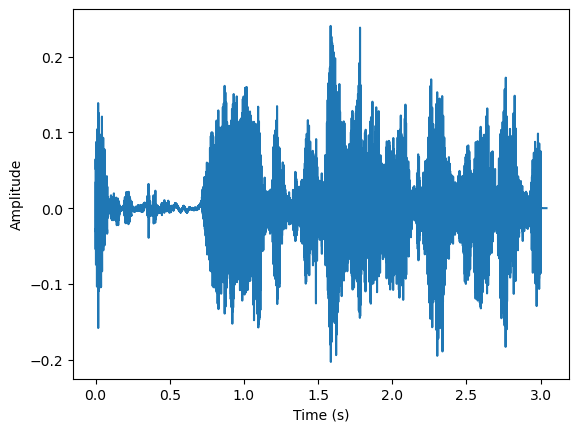

In [10]:
import numpy as np

audio_data = vfc.audio.to_soundarray() 
ts = np.linspace(0, len(audio_data)/44100, len(audio_data))
plt.plot(ts, audio_data[:,0])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

As the human talking sound is inherently connected with language and text, we can refer to the talking content from the sound. When a person speaks in the video, their speech is a time-varying signal. This means that the content of their speech – the words, tones, and inflections – evolves as time progresses. Just as we observe visual changes in the video frames, the audio track also undergoes temporal changes that can be analyzed and interpreted.

There are two main components left, video frame rate and audio sampling rate. How to understand the two parameters? Intuitively, The video frame rate refers to the number of frames displayed per second in the video. In our example,  the frame rate is 25 fps. This means that every second, 25 individual frames are shown. Similarly, the audio sampling rate is a measure of how many samples of the audio signal are taken per second. In our example, the audio sampling rate is 44,100 Hz, which means that the audio is sampled 44,100 times per second. These two parameters reveal: how often does the video frame / audio changes. It is defined as **frequency features**. 

Above are two common examples of signals that exist everywhere in our daily life. To better understand how to analyze these features, we will begin with introducing how to generate signals using code. In this tutorial, we will show some of the most important signals in IoT applications.

### Example 2: Pure Tone Signal

In the second example, we will present signal in a more mathematical way. We use the simplest trigonometric function
$$
s(t) = A \cdot \cos(2 \pi \cdot f \cdot t + \phi).
$$
where
- $s(t)$: signal at time $t$
- $A$ is the amplitude of the signal
- $f$ is the frequency of signal
- $\phi$ is the phase offset.


In [11]:
import numpy as np
from matplotlib import pyplot as plt

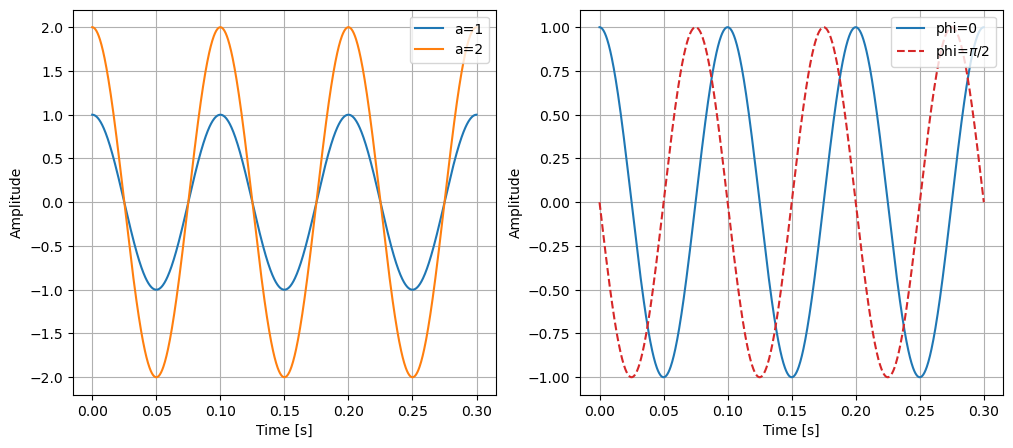

In [12]:
t = np.linspace(0, 0.3, 1000) # time 
f_1 = 10 # frequency
a_1 = 1 # amplitude
a_2 = 2 # amplitude
phi_1 = 0
phi_2 = np.pi/2
s_1 = a_1 * np.cos(2*np.pi*f_1*t) # signal
s_2 = a_2 * np.cos(2*np.pi*f_1*t) # signal
s_3 = np.cos(2*np.pi*f_1*t + phi_2) # signal
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(t, s_1, color="tab:blue")
plt.plot(t, s_2, color="tab:orange")
plt.legend([f"a={a_1}", f"a={a_2}"], loc="upper right")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, s_1, color="tab:blue")
plt.plot(t, s_3, "--", color="tab:red")
plt.legend([f"phi={phi_1}", f"phi=$\pi/2$"], loc="upper right")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

In the left plot, we can see two waves are plotted, with different amplitudes. For the blue line, the amplitude is 1. So the maximum value of it is 1. For the orange line, the amplitude is 2. Higher amplitude means higher maximum values in the wave. We can easily read the amplitude from the temporal figure (i.e. $s(t)$). If this signal represents a sound, the amplitude will affect the loudness of the sound. 

In the right plot, we can see two waves with same frequency are plotted. The only difference is they have different phase offset. It determines where in its cycle the sine wave begins. 

These trigonometric functions only have one frequency each. We call this signal **Pure Tone** or **Sinusoidal Wave**. 

Meanwhile, we want to introduce the complex format of signal here. It is very useful in signal processing. We first recall (or introduce) the Euler's formula:
$$
e^{jt} = \cos(t) + j \cdot \sin(t).
$$
Here we introduce an imaginary number $j^2 = -1$. You may first encounter it when solving a quadratic equation. Mathematically, imaginary number $j$ is of great use when expressing some complicated signal into simple one (You can tell from the above equation.). Actually, this formula is extremely interesting, because it brdiges some seemly inrelevant components (Yet you will soon find they are actually connected.): if we let $t=\pi$, we can derive a intriguing equation: $$e^{i \pi} = -1.$$  It unbelievably connects two powers of infinitely irreducible decimals to an infinitely simple real number.

Then we can introduce the definition of complex number, i.e.
$$
x = a + j\cdot b,
$$
where $x$ is the complex number, $a$ is the real (in-phase) part and $b$ is the imaginary (quadrature) part of $x$. To acquire a geometric understanding, we can think about a complex plane where the horizontal axis represents the real part and the vertical axis represents the imaginary part. And then complex number is cast to a vector $\vec{x} = (a, b)$ in this plane. In other word, every complex number could be interpreted as a point in complex plane. We define
$$
\mathcal{Re}(x) = a,
$$
and
$$
\mathcal{Im}(x) = b,
$$
to denote the function of extracting real and imaginary part.

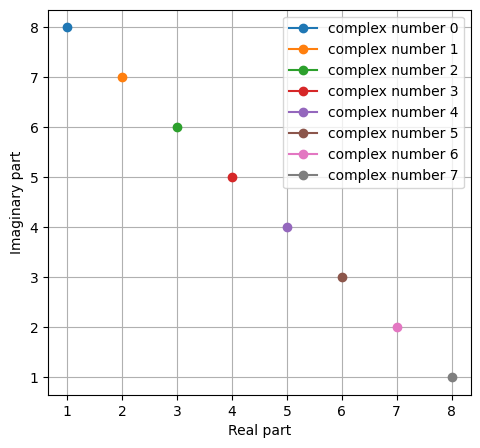

In [13]:
import numpy as np
from matplotlib import pyplot as plt

real_part = [1, 2, 3, 4, 5, 6, 7, 8]
imag_part = [8, 7, 6, 5, 4, 3, 2, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i, (real, imag) in enumerate(zip(real_part, imag_part)):
    x = complex(real, imag)
    x_1 = real + 1j * imag # same as above
    plt.plot(x_1.real, x_1.imag, "o-", label=f"complex number {i}")
    
plt.xlabel("Real part")
plt.ylabel("Imaginary part")
plt.legend(loc="upper right")
plt.grid(True)

Now we can use this perspective to view Euler's formula. On the right hand side, we can interpret it as a complex number, so we have
$$
\begin{aligned}
\mathcal{Re}(e^{jt}) &= \cos(t),\\
\mathcal{Im}(e^{jt}) &= \sin(t),
\end{aligned}
$$
In other word, we can uniform $\cos$ and $\sin$ in a very concise form.

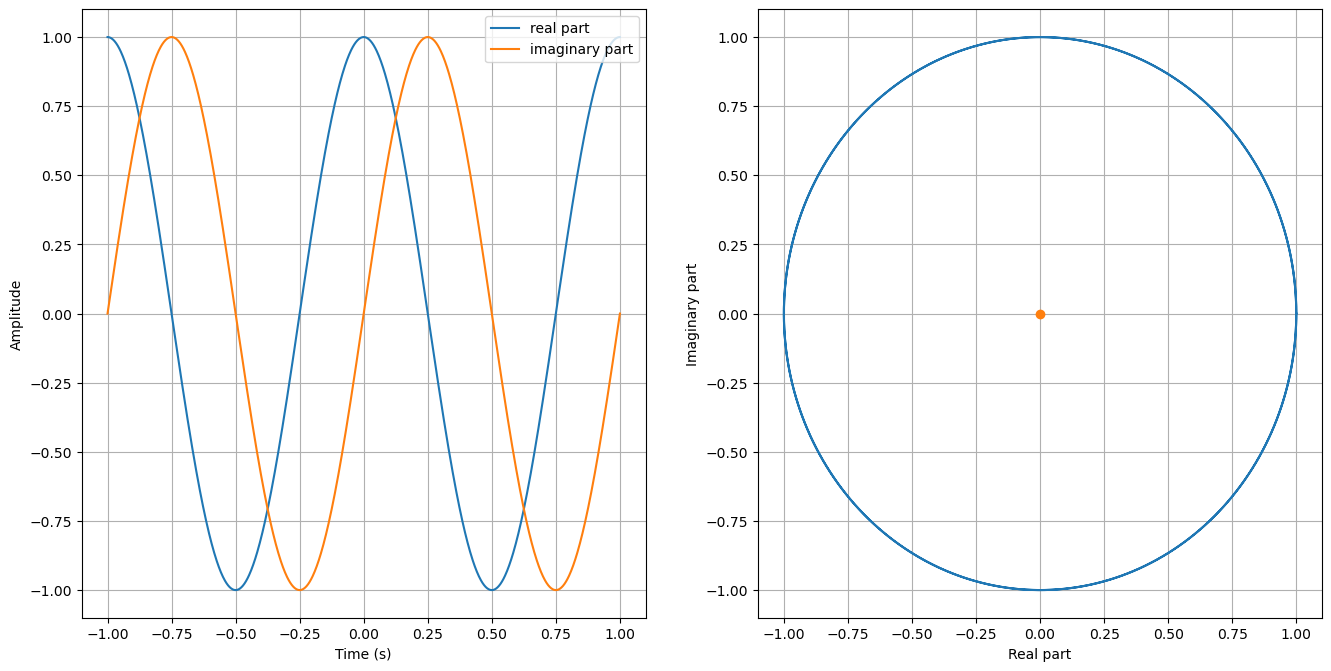

In [14]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(-1, 1, 1000) # time
f_1 = 1 # frequency
s_t = np.exp(2*np.pi*1j*f_1*t) # signal
plt.figure(figsize=(16, 7.9))
plt.subplot(1, 2, 1)
plt.plot(t, s_t.real, color="tab:blue")
plt.plot(t, s_t.imag, color="tab:orange")
plt.legend(["real part", "imaginary part"], loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(s_t.real, s_t.imag, color="tab:blue")
plt.plot(0, 0, "o", color="tab:orange")
plt.xlabel("Real part")
plt.ylabel("Imaginary part")
plt.grid(True)


We can observe two things. First, we can derive two pure tone signals from $e^{jt}$ by decomposing the real and imaginary part. Second, on the complex plane, we find $e^{jt}$ is a circle. We will utilize it later in this course.

### Example 3: Chirp Signal

Here we introduce a different type of signal -- chirp.
A chirp signal is an oscillating wave whose frequency increases or decreases over time. These signals are particularly useful in radar and sonar applications for their ability to penetrate mediums and distinguish different targets at various distances and velocities. 

We can also call it Frequency Modulated Continuous Wave (FMCW).


A basic chirp can be mathematically represented as 
$$
s(t) = A \cdot \cos(2 \pi \int_{0}^{t} f(t) dt  + \phi)
$$
where
- $s(t)$: signal at time $t$
- $A$ is the amplitude of the signal
- $f(t)$ is the instantaneous frequency of the signal as a function of time
- $\phi$ is the phase offset.

$$
f(t)=f_{\text {start }}+\left(\frac{f_{\text {end }}-f_{\text {start }}}{T}\right) \cdot t
$$
where
-  $f_{\text {start }}$ is starting frequency at $ t = 0 $
-  $f_{\text {end}}$ end frequency at $ t = T $
-  $T$ is the period of $f(t)$
  
Notably, we define $\operatorname{abs}(f_{\text {end}} - f_{\text {start }})$ as the **bandwidth** of this signal, denote as $B$.


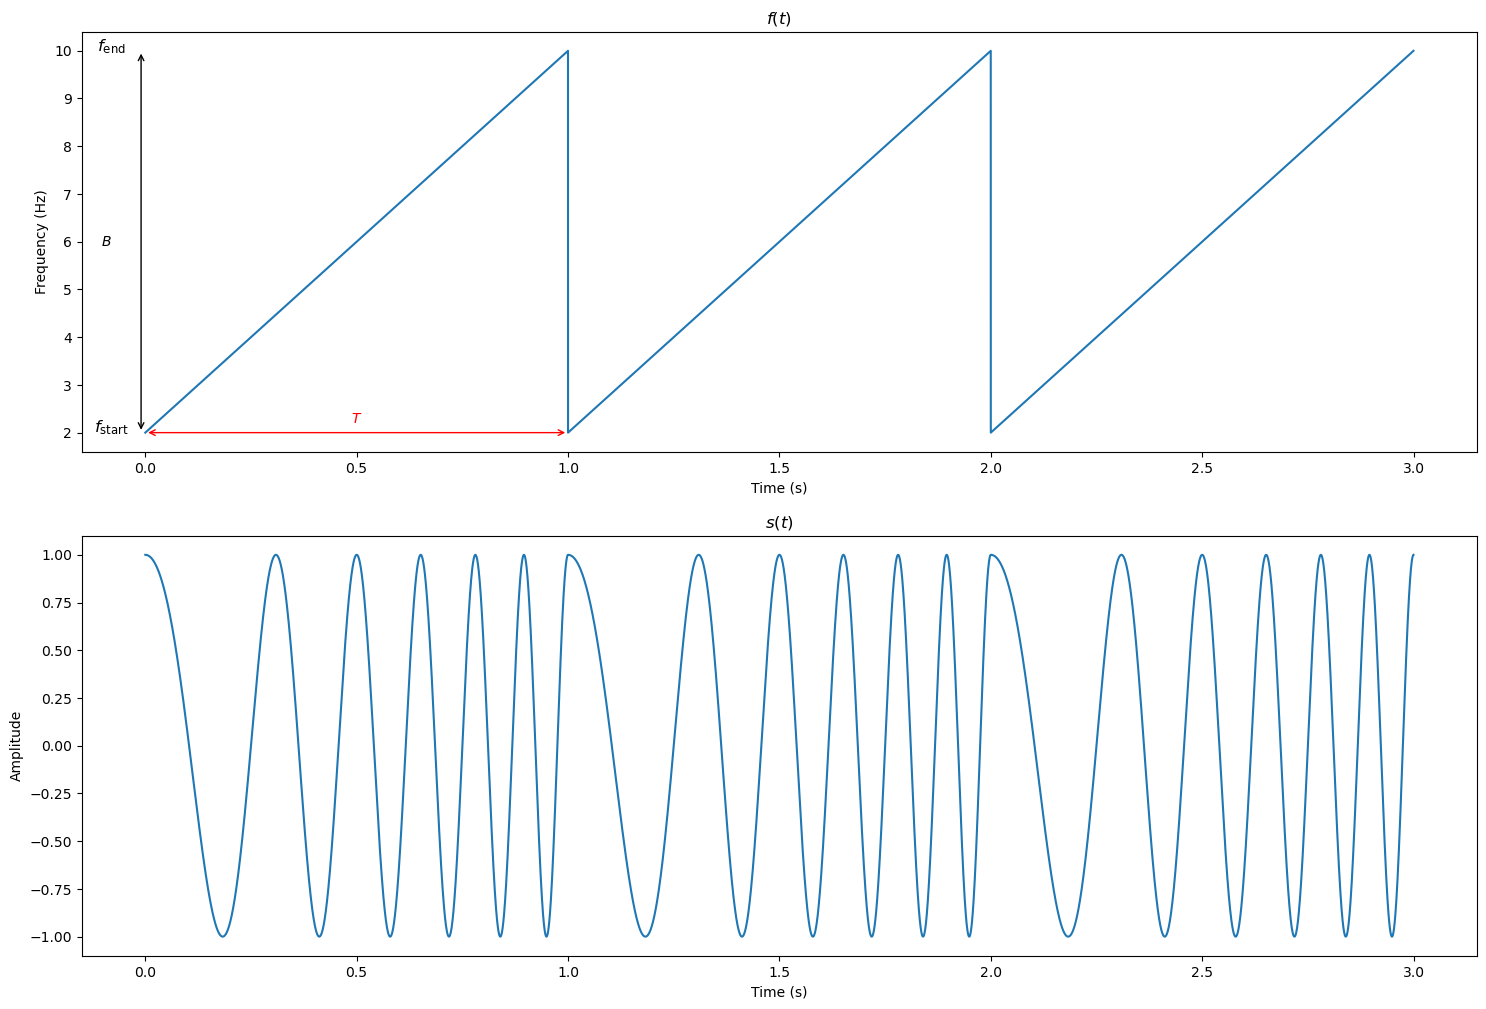

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_start = 2             # Starting frequency in Hz
f_end = 10              # Ending frequency in Hz
T = 1                   # Duration of one period of the chirp in seconds
num_periods = 3         # Number of periods to plot
fs = 8000               # Sampling rate in Hz
B = f_end - f_start     # Bandwidth of the chirp
phi = 0                 # Phase offset of the signal
A = 1                   # Signal amplitude

# Time vector for multiple periods
t = np.linspace(0, num_periods * T, int(num_periods * T * fs), endpoint=False)

# Instantaneous frequency for multiple periods (periodic chirp)
f_t = f_start + B * (t % T) / T

# Plotting f(t) in a style similar to the FMCW signals diagram
plt.figure(figsize=(18, 12))

plt.subplot(211)
# Plot the transmitted chirp signal
plt.plot(t, f_t)

# Annotate important parameters
plt.text(-0.08, f_start, '$f_{\\text{start}}$', fontsize=12, ha='center')
plt.text(-0.08, f_end, '$f_{\\text{end}}$', fontsize=12, ha='center')

# Draw bidirectional arrow and annotate B
plt.annotate('', xy=(-0.01, f_start), xytext=(-0.01, f_end),
             arrowprops=dict(arrowstyle='<->'))
plt.text(-0.08, (f_start + f_end) / 2, '$B$', ha='right', va='center')

# Additional annotations for time period T and sweep time Ts
plt.annotate('', xy=(0, f_start), xytext=(T, f_start), arrowprops=dict(arrowstyle='<->', color='red'))
plt.text(T / 2, 2.2, '$T$', ha='center', color='red')

# Labels and legend
plt.title('$f(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(212)
s_t = A * np.cos(2 * np.pi * ((f_start * (t % T)) + (0.5 * (f_end - f_start) * (t % T)**2 / T)) + phi)
plt.plot(t, s_t)
plt.title('$s(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

You may also consider using the `scipy.signal.chirp` function from the SciPy library to generate chirp signals. This package offers a convenient way to create various types of chirp signals. For detailed usage and options, refer to the SciPy documentation.

### Example 4: Pulse Signal

We then introduce another type of signal -- pulse signal. It can also be named as impulse, rectangle (rect) signal.

Considering a periodic pulse signal, it is defined as below:
$$
\hat{s(t)} \equiv p_\tau(t)= 
\begin{cases}
0 & \text , &-\tau_0 / 2<t<-\tau / 2 \\ 
1 & , &-\tau / 2 \leq t \leq \tau / 2 \\ 
0 & \text ,  &\tau / 2<t \leq \tau_0 / 2
\end{cases},
$$


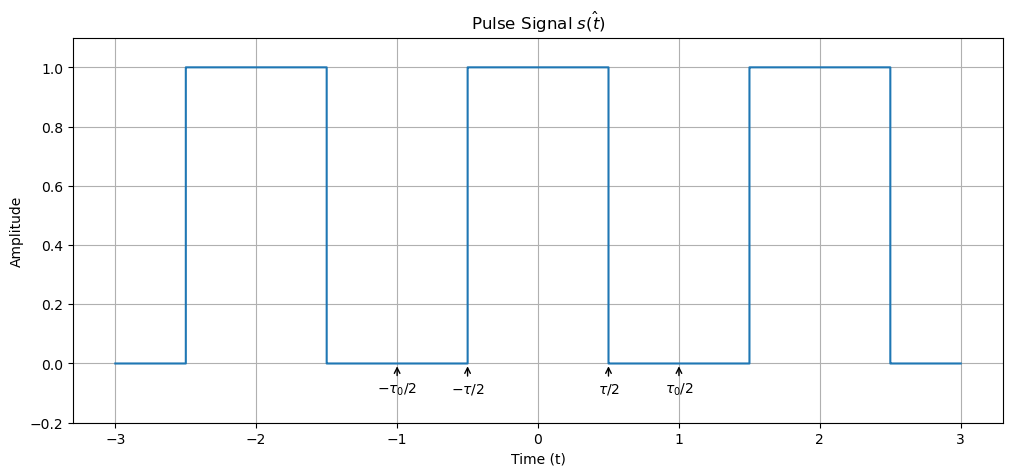

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def p_tau(t, tau, tau_0):
    """
    Defines the pulse signal p_tau(t). 
    It will repeat every tau_0 seconds.

    Parameters:
    t (numpy array): Time array.
    tau (float): Pulse width.
    tau_0 (float): Total period of the signal.

    Returns:
    numpy array: The pulse signal values.
    """
    period = np.floor((t + tau_0 / 2) / tau_0) * tau_0
    t_adjusted = t - period
    return np.where(np.abs(t_adjusted) < tau / 2, 1, 0)

# Set parameters for the pulse signal
tau = 1.0 # Pulse width
tau_0 = 2.0  # Total period of the signal
max_t = 1.5 * tau_0  # Maximum time for plotting

# Generate time array for s(t)
t = np.linspace(-max_t, max_t, 10000)
s_t = p_tau(t, tau, tau_0)

# Plotting s(t)
plt.figure(figsize=(12, 5))
plt.plot(t, s_t, label="$\hat{s(t)}$",drawstyle='steps-post')
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("Pulse Signal $\hat{s(t)}$")
plt.annotate('$-\\tau_0/2$', xy=(-tau_0/2, 0), xytext=(-tau_0/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('$-\\tau/2$', xy=(-tau/2, 0), xytext=(-tau/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('$\\tau/2$', xy=(tau/2, 0), xytext=(tau/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('$\\tau_0/2$', xy=(tau_0/2, 0), xytext=(tau_0/2, -0.1), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.ylim(-0.2, 1.1)
plt.grid(True)

We can see $\hat{s(t)}$ is a periodic signal. If we enlarge $\tau_0$, the period will become larger (but not influencing width of each pulse signal). If $\tau_0$ is a very large number, we can approximately deem $\hat{s(t)}$ as non-periodic signal, namely $s(t)$. 

$\tau$ represents the width of the pulse. When $T$ becomes smaller, the width gets smaller as well. 

Now considering a non-periodical pulse signal which centers at zero and has total energy of 1, we will find it elicit great energy around 0 but at the other points no energy. We call it Dirac Signal, denoted as $\delta(t)$. $\delta(t)$ is not a function in the traditional sense but rather a distribution with the following properties:
$$
\begin{gathered}
\delta(t)= \begin{cases}\infty & \text { for } t=0 \\
0 & \text { for } t \neq 0\end{cases} \\
\int_{-\infty}^{\infty} \delta(t) d t=1
\end{gathered}
$$

Of course we can not generate such signal in practice, but we have many ways to approach $\delta(t)$. Below is an example:
$$
\delta(t) = 
\begin{cases}
\dfrac{1}{\tau} & \text { for } -\tau/2 \le t \le \tau/2 \\
0       & \text { otherwise}
\end{cases}
$$
We can deem it as a special case of pulse signal.

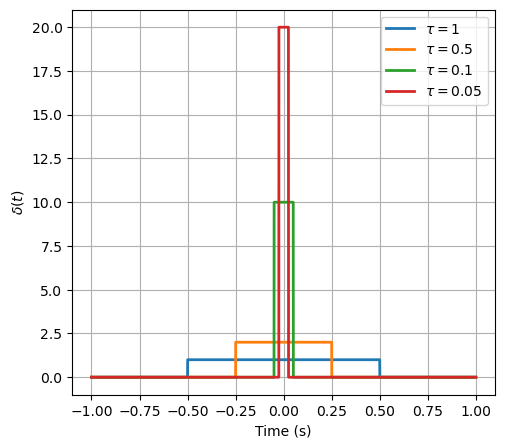

In [17]:
import numpy as np
import matplotlib.pyplot as plt

tau_list = [1, 0.5, 0.1, 0.05]
linestyle_list = ['-', '--', '-.', ':']

def delta_t(t, tau):
    """
    Defines the delta function delta(t). 

    Parameters:
    t (numpy array): Time array.
    tau (float): Pulse width.

    Returns:
    numpy array: The delta function values.
    """
    return np.where((t >= -tau/2) & (t <= tau/2), 1/tau, 0)

plt.figure(figsize=(12, 5))
plt.subplot(121)

t = np.linspace(-1, 1, 10000)
for tau in tau_list:
    plt.plot(t, delta_t(t, tau), label=f"$\\tau={tau}$", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("$\delta(t)$")
plt.legend()
plt.grid(True)

In this tutorial, we talk about what is signal and introduce some useful signals in our course. We focus on showing how to generate these signals. In the later tutorial, we will show how to analyze these signals (data). 

## Programming Task

Please refer to `task_1.pdf` for more details.

After implementing the tasks, **please run `python check.py --uid <YOUR_UID>` before submitting.** This script performs automated tests on the examples provided in the docstrings. Failing these tests indicates potential critical issues in your code. Strive to resolve these problems. After that, it will create a zip file named after your `uid`. Make sure you enter the right `uid`. 

It's important to avoid changing the names of any files, including both the zip file and the program files contained within. Altering file names can lead to grading errors. Ensure that all file names remain as they are to facilitate accurate assessment of your work.

Your submission to **Moodle** should consist solely of the **generated `*.zip` file**. It is your responsibility to double check whether your submitted zip file includes your latest work. 